# Denetimsiz Öğrenme

In [1]:
from sklearn.datasets import make_blobs #Rastgele veri oluşturma kütüphanesi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X, y_true = make_blobs( n_samples=300, centers=4, random_state=42 )  #Burada y_true kullanılma sebebi,doğru y değerleri yani doğru küme verisini tutması   .
#n_samples: veri sayısı 
#centers: Grup küme sayısı
X

array([[ -9.29768866,   6.47367855],
       [ -9.69874112,   6.93896737],
       [ -1.68665271,   7.79344248],
       [ -7.09730839,  -5.78133274],
       [-10.87645229,   6.3154366 ],
       [ -6.02196757,  -7.04004812],
       [  4.81305976,   2.35848706],
       [ -6.46669574,  -7.44383415],
       [ -2.98837186,   8.82862715],
       [  3.44857534,   2.62972329],
       [ -3.11090424,  10.86656431],
       [  4.99689432,   1.28026009],
       [ -2.30033403,   7.054616  ],
       [ -3.92456837,   8.59364081],
       [ -9.48897033,   6.83639753],
       [ -3.21125072,   8.68662398],
       [-10.46587019,   7.37160786],
       [  2.61473625,   2.159624  ],
       [ -2.41212007,   9.98293112],
       [ -1.92234053,  11.20474175],
       [  5.79847442,   1.15248737],
       [ -2.67048333,   9.41833699],
       [ -5.90450746,  -7.02716697],
       [ -8.95065581,   7.10255332],
       [ -2.97261532,   8.54855637],
       [ -8.30852358,   8.76509154],
       [ -9.41509909,   8.07891414],
 

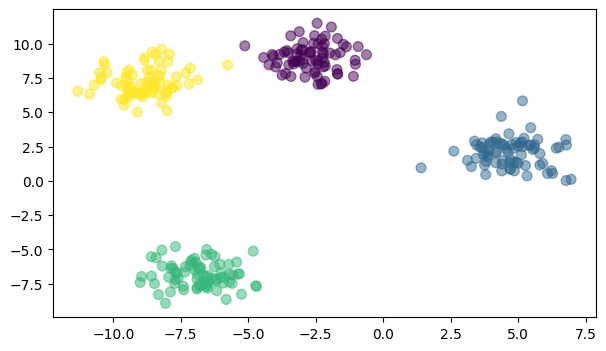

In [3]:
plt.figure( figsize=(7,4) )
plt.scatter( X[:,0], X[:,1], c=y_true, s=50 ,alpha=0.5) #c renk arrayine kümeleri verirsek farklı renklendirir.alpha renk saydamlığını belirler.s ise size noktanın alanını belirler.
# X[:,0] => Tüm satırların 0. sütununu al. X[:,1] => Tüm satırların 1. sütununu al.

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[ [ "Annual Income (k$)", "Spending Score (1-100)" ] ].values #.values yapınca veriyi dataframeden array haline çevirdik.



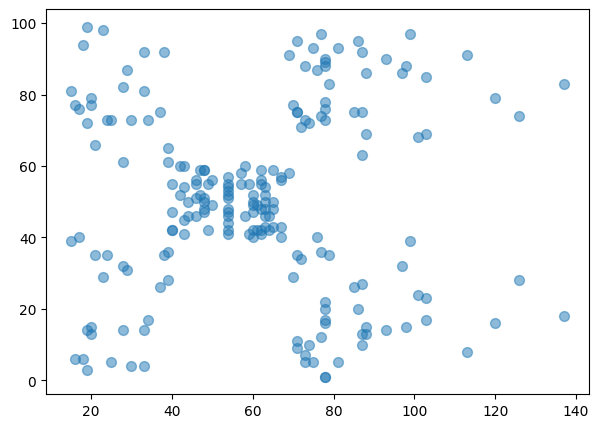

In [6]:
plt.figure( figsize=(7,5) )
plt.scatter( X[:,0], X[:,1] , s=50 ,alpha=0.5)

## K-Means Algoritması : Belirli bir kümelenme ile sistemin veriler arasındaki yapıyı öğrenmesidir.

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans( n_clusters=5, random_state=42 ) #n_clusters parametresi küme sayısını belirtir.
model.fit(X) #Burada sadece train veri setini verdik çünkü etiketler öğrenme modelinde yok.

KMeans(n_clusters=5, random_state=42)

In [9]:
model.cluster_centers_ #Çıkan sonuçtataki veriler merkez küme koordinatlarını verir.

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [10]:
y = model.predict(X)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

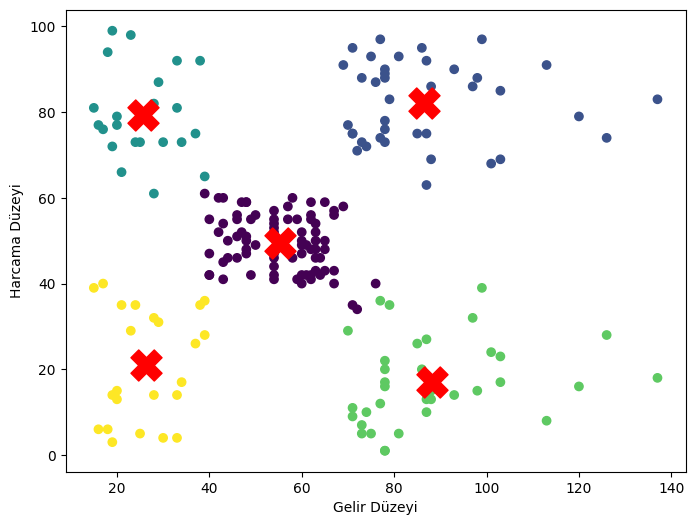

In [11]:
plt.figure( figsize=(8,6) )
plt.scatter( X[:,0], X[:,1], c=y ) #Burda  c parametresi yani renklere y tahmin dizisini verme sebebimiz her gruba farklı renk vermesidir. Bu sayede her x,y koordinatındaki veriyi ait olduğu küme rengine boyadı.
plt.scatter( model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red", s=500, marker="X" ) 
plt.xlabel("Gelir Düzeyi")
plt.ylabel("Harcama Düzeyi")
plt.show()

In [12]:
#Burada bazı veriler kümelerden çok aykırı durumda bundan sebep küme sayımız yanlış gibi buna çözüm yolları bulmalıyız.

### Dirsek ELBOW Metodu

In [13]:
model.inertia_ # İnertias her merkez kümenin diğer noktalar arasında kendisine olan uzaklığının karelerinin toplamıdır. Ne kadar çok merkez küme olursa inerrtias düşer ancak bu sayı abartılmamalı dirsek noktasında bırakılmalıdır. Diğer veri merkezleri ile arasındaki ilişkiyi ölçmez

44448.45544793371

In [14]:
#Bu metodun amacı inertias değerlerini karşılaştırmak.
def elbow_method():
    inertias = []
    for k in range(2,11):
        model = KMeans( n_clusters=k , random_state=42)
        model.fit(X)
        inertias.append( model.inertia_ )
    print(inertias)
    plt.figure( figsize=(8,6) )
    plt.plot( range(2,11), inertias )

[183653.32894736846, 106348.3730621112, 73880.64496247195, 44448.45544793371, 40825.16946386947, 33642.57922077922, 26686.83778518779, 24766.47160979344, 23103.122085983912]


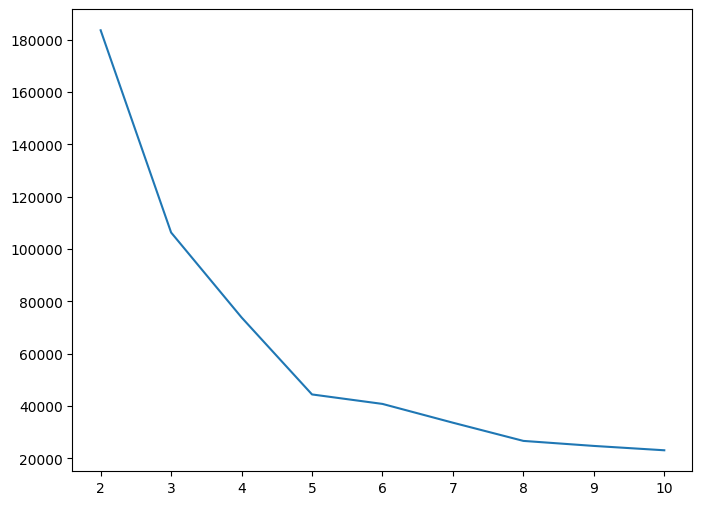

In [15]:
elbow_method()
#Grafiğe göre dirseğin oluştuğu nokta 5. Eğer dirsek gözükmüyorsa halen grafikte parametreleri arttırmak veya değişmek gerekiyor.

### Silhoutte Metodu

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
#Bu yöntemdede noktaların sadece ait olduğu küme merkezine uzaklığı değil diğer merkez noktalara uzaklığıda hesaba katılır.
def silh_method():
    scores = []
    for k in range(2,11):
        kmeans = KMeans( n_clusters=k, random_state=42 )
        y = kmeans.fit_predict(X)
        scores.append( silhouette_score(X,y) )
    print(scores)
    plt.figure(figsize=(8,6))
    plt.plot( range(2,11), scores )
    plt.show()

[np.float64(0.39564531743995546), np.float64(0.46761358158775435), np.float64(0.4937945814354117), np.float64(0.553931997444648), np.float64(0.5128405328004378), np.float64(0.5017174409749505), np.float64(0.4962769338093321), np.float64(0.45587414130065596), np.float64(0.4426214845978157)]


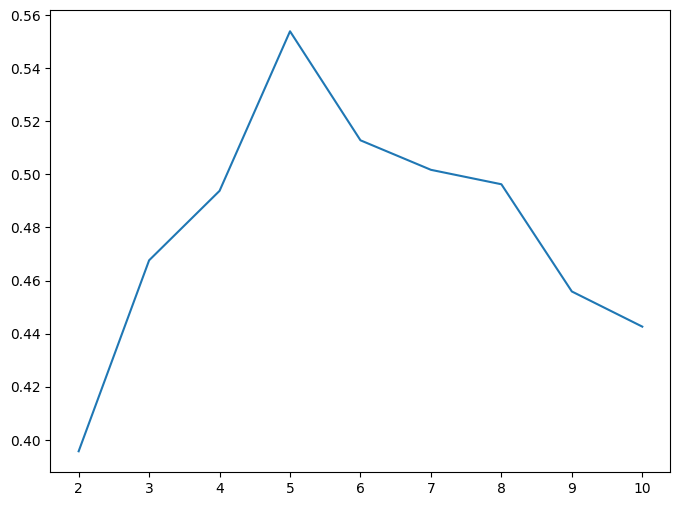

In [18]:
silh_method()

##### Davies Bouldin Metodu araştır bu CSV uygula. <br> <br> Makine öğrenmesinde Scaling (Özellik Ölçekleme) nedir nasıl yapılır araştırıp ipynb oluştur.

### DAVİES-BOULDİN SCORE

##### Davies-Bouldin, kümeleme modellerini değerlendirmek için kullanılan bir doğrulama metriğidir. Her kümenin, kendisine en çok benzeyen kümeyle olan ortalama benzerlik ölçüsü olarak hesaplanır. Bu bağlamda benzerlik, kümeler arası ve küme içi mesafeler arasındaki oran olarak tanımlanır. Bu nedenle, bu endeks daha az dağılıma sahip iyi ayrılmış kümeleri daha iyi bir puana sahip olarak sıralar Silhouette Puanı değerlendirme metriğinin aksine, kümelerin şekli hakkında herhangi bir varsayımda bulunmaz.

#### Davies-Bouldin Endeksi nasıl hesaplanır?

#### 1-Her kümedeki noktalar ile kümenin ağırlık merkezi arasındaki ortalama uzaklığı hesaplayın.<br>2-Her kümenin kütle merkezleri ile en yakın küme arasındaki mesafeyi hesaplayın.<br>3-Bir kümedeki noktalar ile kümenin ağırlık merkezi arasındaki ortalama uzaklığın, kümenin ağırlık merkezleri ile en yakın küme arasındaki uzaklığa oranını hesaplayınız.<br>4-Her küme için 1-3 adımlarını tekrarlayın.<br>4-Tüm kümeler için oranların ortalamasını hesaplayın.

In [25]:
from sklearn.metrics import davies_bouldin_score

In [30]:

def davies_bouldin_method():
    scores = []
    all_labels = []

    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = davies_bouldin_score(X, labels)
        scores.append(score)
        all_labels.append((kmeans, labels))

    # Davies-Bouldin skor grafiği
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, 11), scores, marker='o')
    plt.xlabel('Cluster Sayısı (k)')
    plt.ylabel('Davies-Bouldin Skoru')
    plt.title('Davies-Bouldin Skorlarına Göre Küme Kalitesi')
    plt.grid(True)
    plt.show()

    # En iyi (en düşük DB skoru) k'yı bul
    best_k_index = np.argmin(scores)
    best_kmeans, best_labels = all_labels[best_k_index]
    best_k = best_k_index + 2  # çünkü range 2-11 arası

    print(f"En iyi Davies-Bouldin Skoru: {scores[best_k_index]:.4f} (k = {best_k})")

    # Kümeleme görselleştirmesi (2D veriler için)
    if X.shape[1] >= 2:
        plt.figure(figsize=(8, 6))
        centroids = best_kmeans.cluster_centers_
        for i in range(best_k):
            cluster_data = X[best_labels == i]
            plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')
        plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='k', marker='X', label='Centroids')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'K-Means Kümeleme Sonucu (k = {best_k})')
        plt.legend()
        plt.show()
    else:
        print("Veri görselleştirmek için en az 2 özellik (feature) içermelidir.")

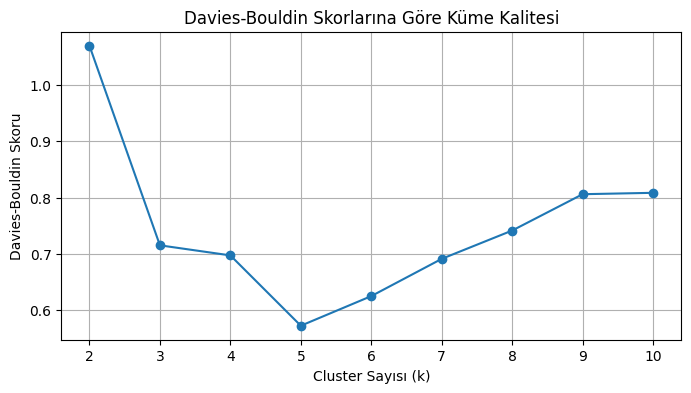

En iyi Davies-Bouldin Skoru: 0.5726 (k = 5)


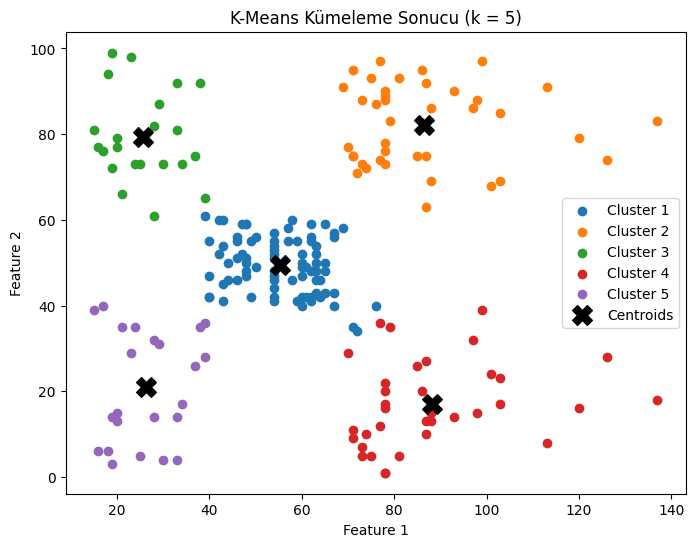

In [31]:
davies_bouldin_method()

## MAKİNE ÖĞRENMESİNDE SCALİNG (ÖZELLİK ÖLÇEKLEME)

### Asıl amacı veri ön işleme aşamasında verileri belirli değer aralığına getirip makine öğrenmesinin performansını arttırmaktır. Aykırı değerlerin etkisi azaltılır ancak hassas değerleri kaybedilebilir.

### -Normalizasyon(Min-Max Scaling) : Verinin minimum ve maximum değerleri arasında ölçeklendirme işlemi yapar. Verileri 0-1 aralığındaki dağılımına göre oranla ölçeklendirir.Min-max ölçeklendirme olarak da bilinen normalleştirme, özellikleri 0 ile 1 arasında bir aralığa dönüştürür. Özelliğin minimum değerini çıkarır ve aralığa böler (maksimum değer eksi minimum değer). Bu teknik, verilerin dağılımı bir Gauss dağılımını takip etmediğinde uygundur. <br><br>-Robust Scaler : Normalizasyon ile benzer şekilde çalışır. Aykırı değerlere sahip verilerde daha iyi sonuçlar verebilir. Yine veri dağılımı ile benzerlik gösterir ancak aykırı değerler dışarıda kalır. Medyan değeri sonradan kullanılmak üzere elenir ve değerler 1.ve 3. kartil aralığına oturtulur.<br><br>-Standardizasyon(Standart Scaler) : Standardizasyon, özellikleri ortalama 0 ve standart sapma 1 olacak şekilde dönüştürür. Özelliğin ortalamasını çıkarır ve standart sapmaya böler. Bu teknik, veriler normal olarak dağıtıldığında veya dağıtımı önceden bilmediğimizde tercih edilir. Standardizasyon dağıtımın şeklini korur ve özellikleri belirli bir aralığa bağlamaz. Verilerin normal dağılıma sahipse tercih edilir ve aykırı değerlere daha dayanıklıdır. Ortalama 0 standart sapma 1 olarak alınır. <br><br> - PowerTransformer : PowerTransformer, varyansı stabilize etmek ve çarpıklığı en aza indirmek için en uygun ölçeklendirme faktörünü bulur. Yine ortalama değerin 0, standart sapmanın ise 1 değerini aldığı bir metoddur. 